# Introduction to neural network classification with TensorFlow

* Binary classification 
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [33]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise = 0.03,
                    random_state = 42)

In [34]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [35]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Visualize the data

In [36]:
import pandas as pd

circles = pd.DataFrame( {"X0" : X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


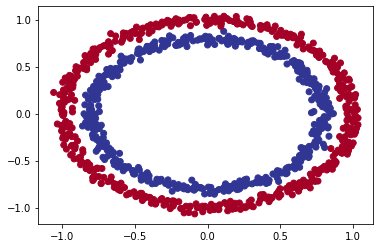

In [37]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

## Input and output shapes

In [38]:
X.shape, y.shape

((1000, 2), (1000,))

In [39]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [40]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [41]:
# Number of samples

len(X), len(y)

(1000, 1000)

In [42]:
# Viewing the first example of features and lables
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [43]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Create
model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

# Compile
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# Fit the model
model_1.fit(X, y, epochs = 5)


Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [44]:
# Train for longer
model_1.fit(X, y, epochs = 200, verbose = 0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [45]:
# adding another layer

# random seed
tf.random.set_seed(42)

# create model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

# Compile
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# fit the model
model_2.fit(X, y, epochs = 100, verbose= 0)

In [46]:
# Evaluate model 2
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [47]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

In [48]:
# Adding an extra layer and adding more hidden units

# random seed
tf.random.set_seed(42)

# create model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100), # add 100 dense nurons
                               tf.keras.layers.Dense(10), # add another layer with 10 neurons
                               tf.keras.layers.Dense(1)
])

# Compile
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model
model_3.fit(X, y, epochs = 100, verbose= 0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

## Function to plot decision boundary

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (Where each unique class falls)

In [49]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  plots the decision boundary created by a model prediciting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # make predictions
  y_pred = model.predict(x_in)

  # check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)

  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


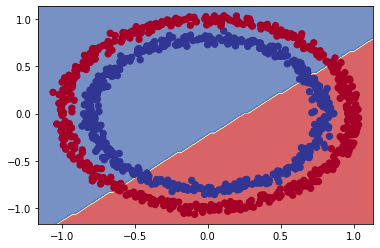

In [50]:
# check predictions our model is making

plot_decision_boundary(model = model_3,
                       X = X,
                       y = y)

In [51]:
tf.random.set_seed(42)

# create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# spit the data into training and test set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [52]:
# random seed
tf.random.set_seed(42)

# create model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# Compile - regression specific loss function
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

# fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

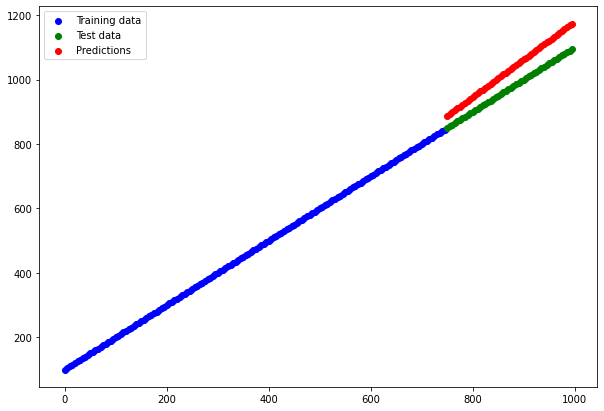

In [53]:
# check predictions with our trained model

y_reg_preds = model_3.predict(X_reg_test)

# plot the model's predictions against our regression data

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c = "b", label = "Training data")
plt.scatter(X_reg_test, y_reg_test, c = "g", label = "Test data")
plt.scatter(X_reg_test, y_reg_preds, c = "r", label = "Predictions")
plt.legend()

## The missing piece: Non-linearity

In [54]:
# random seed
tf.random.set_seed(42)

# create model
model_4 = tf.keras.Sequential([
          tf.keras.layers.Dense(1, activation = tf.keras.activations.linear),

])

# Compile - regression specific
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

# fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/100
32/32 [=

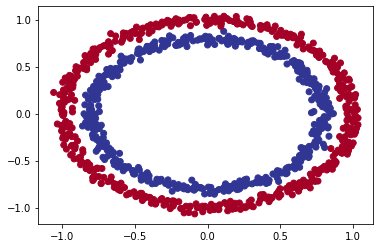

In [55]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

doing binary classification


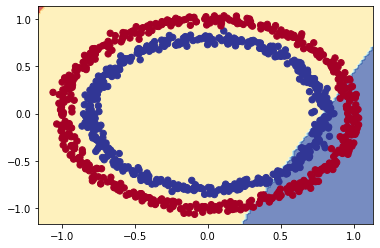

In [56]:
# decision boundary of the latest model

plot_decision_boundary(model_4, X, y)

### Building the first model with non-linear activation function

In [57]:
# random seed
tf.random.set_seed(42)

# create model
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation = tf.keras.activations.relu),

])

# Compile - regression specific
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

# fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/100
32/32 [=

In [58]:
# random seed
tf.random.set_seed(42)

# create model
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)

])

# Compile - regression specific
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

# fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/250
32/32 [=

In [59]:
# evaluate

model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


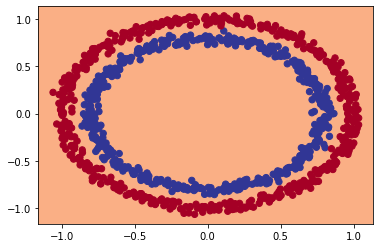

In [60]:
# predictions

plot_decision_boundary(model_6, X, y)

In [61]:
# random seed
tf.random.set_seed(42)

# create model
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(1, activation = "sigmoid")

])

# Compile - regression specific
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

# fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/100
32/32 [=

In [62]:
# evaluation

model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classification


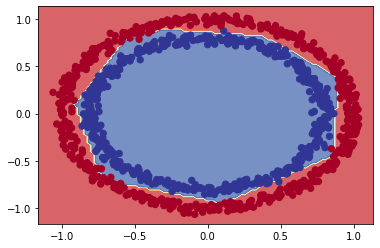

In [63]:
# Visualzie

plot_decision_boundary(model_7, X, y)

In [66]:
# toy tensor

A = tf.cast(tf.range(-10, 10), tf.float32)
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

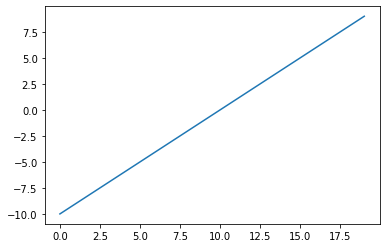

In [67]:
plt.plot(A)

In [68]:
# replicate sigmoid - sigmoid(X) = 1 / (1 + exp(-x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use sigmoid function

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

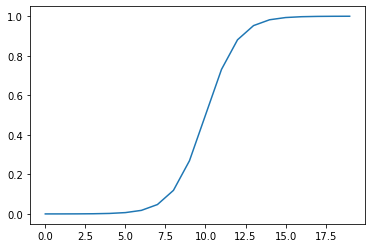

In [69]:
plt.plot(sigmoid(A))

In [70]:
# replicate relu function

def relu(x):
  return tf.maximum(0, x)

# pass the tensor

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [71]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

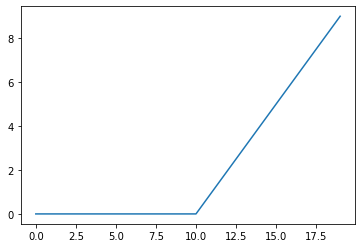

In [72]:
plt.plot(relu(A))